In [1]:
#Group 4
#Authors: Sumandeep Kaur, Saihaj Mann, Quynh Ngo, Peter Truong, Owen Rose, Trien Xuong LU
#Project: Calgary Community Crime Statistics

### Purpose ###
#Analyze and visualize crime trends in Calgary

#Website of Data
#https://data.calgary.ca/Health-and-Safety/Community-Crime-Statistics/78gh-n26t

#Website used to scrape Socrata 
#https://dev.socrata.com/foundry/data.calgary.ca/78gh-n26t

#Libraries Used
from sodapy import Socrata
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Get Data#
socrata_domain = "data.calgary.ca"              #<--- Open database
socrata_identifier = "78gh-n26t"                #<--- Calgary Crime Stats Dataset
app_token = 'hTDCmDPAMga7ZzENEaEhREweG'         #<--- Removes throttle limit with token
query_2022 = "year = '2022'"

#Query to grab dataset
#Dataset too big to run, so we'll test on 2022 data


#Query format to get data from Socrata
client = Socrata(socrata_domain, app_token)
data_2022 = client.get_all(socrata_identifier, where = query_2022) 

test_data = pd.DataFrame.from_records(data_2022)
test_data.tail()

#How we would get 2019 - 2022 if there wasn't a size limit problem

#query_2019 = "year = '2019'"
#query_2020 = "year = '2020'"
#query_2021 = "year = '2021'"

#results2019 = client.get_all(socrata_identifier, where = query_2019) 
#results2020 = client.get_all(socrata_identifier, where = query_2020) 
#results2021 = client.get_all(socrata_identifier, where = query_2021) 

#data_2019 = pd.DataFrame.from_records(results2019)
#data_2020 = pd.DataFrame.from_records(results2020)
#data_2021 = pd.DataFrame.from_records(results2021)
#data_2022 = pd.DataFrame.from_records(results2022)
#frames = [data_2019, data_2020,data_2021, data_2022]

#Combine data
#df_calgary = pd.concat(frames)



,sector,community_name,category,crime_count,resident_count,date,year,month,long,lat,id,community_center_point
9877,NORTHEAST,CASTLERIDGE,Break & Enter - Commercial,1,NaN,2022-04-01T00:00:00.000,2022,APR,-113.96102973195798,51.10525413453473,2022-APR-CASTLERIDGE-Break & Enter - Commercial,"{'type': 'Point', 'coordinates': [-113.9610297..."
9878,CENTRE,BELTLINE,Break & Enter - Other Premises,1,NaN,2022-04-01T00:00:00.000,2022,APR,-114.05518879725622,51.03743792621707,2022-APR-BELTLINE-Break & Enter - Other Premises,"{'type': 'Point', 'coordinates': [-114.0551887..."
9879,NORTHEAST,SUNRIDGE,Break & Enter - Other Premises,1,NaN,2022-04-01T00:00:00.000,2022,APR,-113.99170056999279,51.074221599518935,2022-APR-SUNRIDGE-Break & Enter - Other Premises,"{'type': 'Point', 'coordinates': [-113.9917005..."
9880,NORTH,HUNTINGTON HILLS,Break & Enter - Commercial,1,NaN,2022-03-01T00:00:00.000,2022,MAR,-114.06670944395931,51.11758229183931,2022-MAR-HUNTINGTON HILLS-Break & Enter - Comm...,"{'type': 'Point', 'coordinates': [-114.0667094..."
9881,CENTRE,UPPER MOUNT ROYAL,Break & Enter - Commercial,2,NaN,2022-03-01T00:00:00.000,2022,MAR,-114.08502788624112,51.02996707647276,2022-MAR-UPPER MOUNT ROYAL-Break & Enter - Com...,"{'type': 'Point', 'coordinates': [-114.0850278..."


In [3]:
#Check columns
test_data.columns.values

array(['sector', 'community_name', 'category', 'crime_count',
       'resident_count', 'date', 'year', 'month', 'long', 'lat', 'id',
       'community_center_point'], dtype=object)

In [4]:
### Clean Data ###
test_data = test_data.iloc[:,0:11]            #<--- I only need the first 11 columns
test_data.dtypes                               #<--- Check data types for each column

sector            object
community_name    object
category          object
crime_count       object
resident_count    object
date              object
year              object
month             object
long              object
lat               object
id                object
dtype: object

In [5]:
#Only run this block once or there will be an error. Rerun all code from beginning if this occurs

#Change columns into correct data type
test_data['crime_count'] = pd.to_numeric(test_data['crime_count'])
test_data['resident_count'] = pd.to_numeric(test_data['resident_count'])
test_data['long'] = pd.to_numeric(test_data['long'])
test_data['lat'] = pd.to_numeric(test_data['lat'])

test_data['date'] = test_data['date'].str[:7]
test_data['date'] = pd.to_datetime(test_data['date'])

In [6]:
#Make sure the columns have the correct data type
test_data.dtypes 

sector                    object
community_name            object
category                  object
crime_count                int64
resident_count           float64
date              datetime64[ns]
year                      object
month                     object
long                     float64
lat                      float64
id                        object
dtype: object

In [7]:
#Check for duplicated data
test_data.duplicated().sum()

0

In [8]:
test_data[test_data.isnull().any(axis=1)]

,sector,community_name,category,crime_count,resident_count,date,year,month,long,lat,id
87,NaN,AMBLETON,Break & Enter - Other Premises,1,NaN,2022-07-01,2022,JUL,NaN,NaN,2022-JUL-AMBLETON-Break & Enter - Other Premises
1771,NaN,SYMONS VALLEY RANCH,Theft OF Vehicle,2,NaN,2022-08-01,2022,AUG,NaN,NaN,2022-AUG-SYMONS VALLEY RANCH-Theft OF Vehicle
3816,NaN,AMBLETON,Break & Enter - Commercial,1,NaN,2022-07-01,2022,JUL,NaN,NaN,2022-JUL-AMBLETON-Break & Enter - Commercial
5447,NaN,SCARBORO/SUNALTA WEST,Break & Enter - Commercial,1,NaN,2022-06-01,2022,JUN,NaN,NaN,2022-JUN-SCARBORO/SUNALTA WEST-Break & Enter -...
5579,NaN,SYMONS VALLEY RANCH,Theft FROM Vehicle,1,NaN,2022-06-01,2022,JUN,NaN,NaN,2022-JUN-SYMONS VALLEY RANCH-Theft FROM Vehicle
...,...,...,...,...,...,...,...,...,...,...,...
9877,NORTHEAST,CASTLERIDGE,Break & Enter - Commercial,1,NaN,2022-04-01,2022,APR,-113.961030,51.105254,2022-APR-CASTLERIDGE-Break & Enter - Commercial
9878,CENTRE,BELTLINE,Break & Enter - Other Premises,1,NaN,2022-04-01,2022,APR,-114.055189,51.037438,2022-APR-BELTLINE-Break & Enter - Other Premises
9879,NORTHEAST,SUNRIDGE,Break & Enter - Other Premises,1,NaN,2022-04-01,2022,APR,-113.991701,51.074222,2022-APR-SUNRIDGE-Break & Enter - Other Premises
9880,NORTH,HUNTINGTON HILLS,Break & Enter - Commercial,1,NaN,2022-03-01,2022,MAR,-114.066709,51.117582,2022-MAR-HUNTINGTON HILLS-Break & Enter - Comm...


In [9]:
crimes_charged = test_data['crime_count'].sum()

print("In 2022, the number of crimes charged in Calgary is:", crimes_charged,)

In 2022, the number of crimes charged in Calgary is: 27800


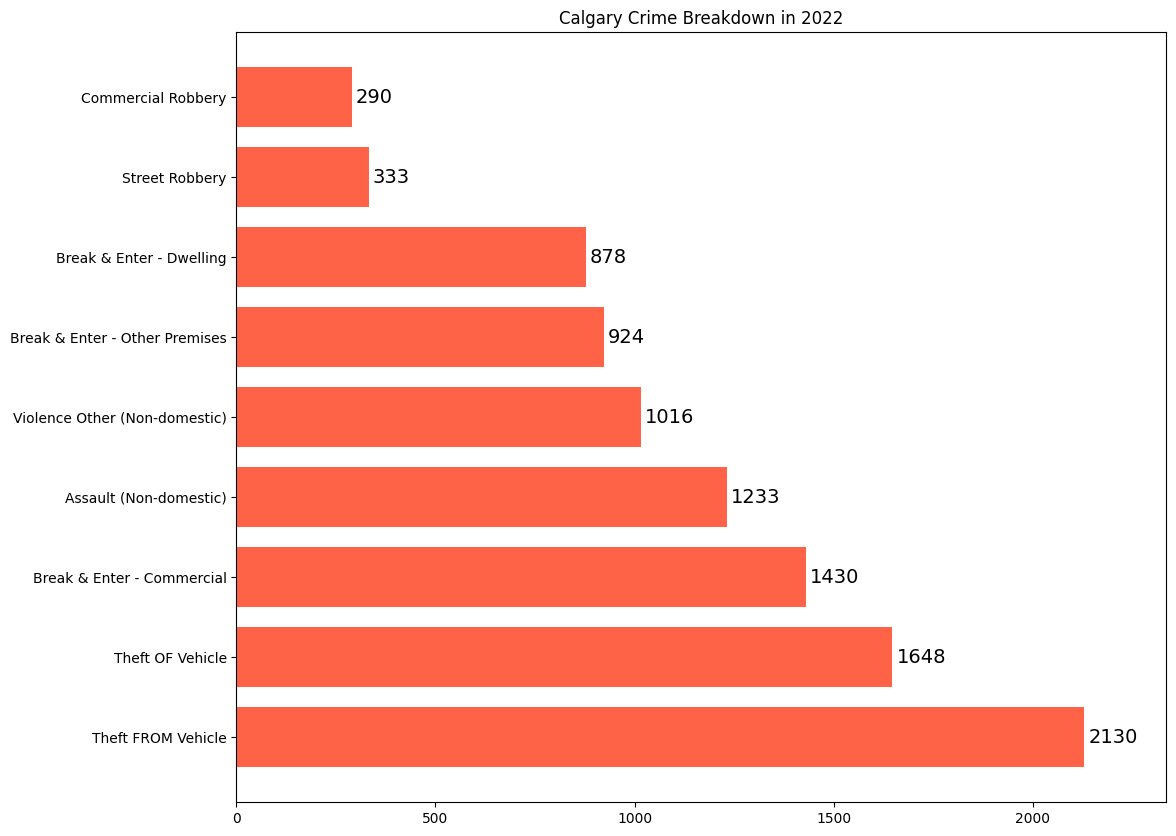

In [10]:
# Bar chart of Crime breakdown in 2022
#Code is taken off of
y0 = test_data['category'].value_counts()
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y0.index, y0, height=0.75, color="tomato")
plt.title('Calgary Crime Breakdown in 2022')
_, xmax = plt.xlim()
plt.xlim(0, xmax+100)

for i, v in enumerate(y0):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')

In [11]:
#Create a dataframe of vehicle crime
vehicle_crime = test_data[(test_data['category'] == 'Theft FROM Vehicle') | (test_data['category'] == 'Theft OF Vehicle')]

In [12]:
#Vehicle crime based on sector
vehicle_crime['sector'].value_counts()

CENTRE       905
NORTHEAST    694
SOUTH        576
NORTHWEST    367
NORTH        339
EAST         307
WEST         299
SOUTHEAST    282
Name: sector, dtype: int64

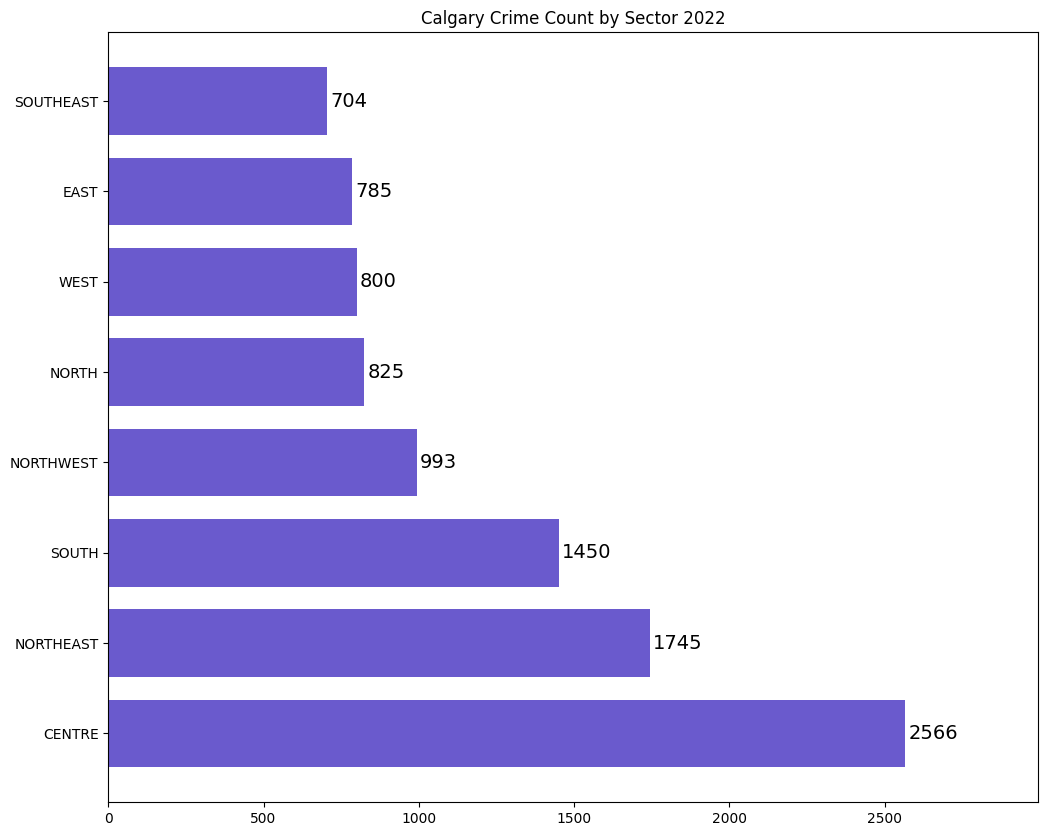

In [17]:
#Crime Count by Sector
y1 = test_data['sector'].value_counts(ascending=False)
fig, ax = plt.subplots(figsize=(12,10))
ax.barh(y1.index, y1, height=0.75, color="slateblue")
plt.title('Calgary Crime Count by Sector 2022')
_, xmax = plt.xlim()
plt.xlim(0, xmax+300)

for i, v in enumerate(y1):                   #<--- Add data labels
    ax.text(v + 10, i, str(v), color='black', fontsize=14, ha='left', va='center')

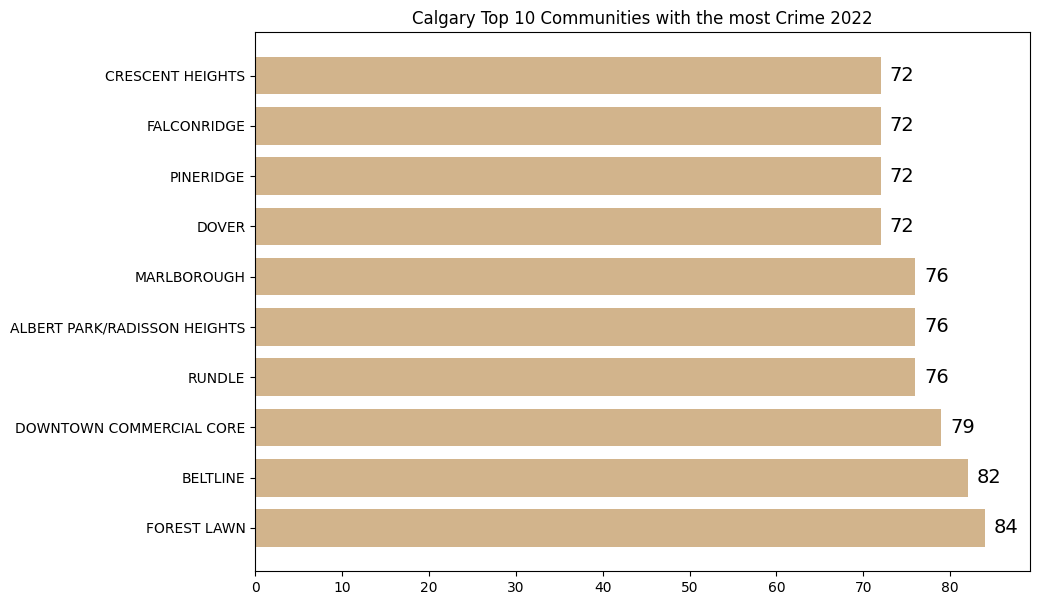

In [18]:
#Crime Count by Community
y2 = test_data['community_name'].value_counts()[:10] #<--- Top 10 Communities with the most crime.

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(y2.index, y2, height=0.75, color="tan")
plt.title('Calgary Top 10 Communities with the most Crime 2022')
_, xmax = plt.xlim()
plt.xlim(0, xmax+1)

for i, v in enumerate(y2):                   #<--- Add data labels
    ax.text(v + 1, i, str(v), color='black', fontsize=14, ha='left', va='center')

Text(0.5, 1.0, 'Timeline of Crime in Calgary 2022')

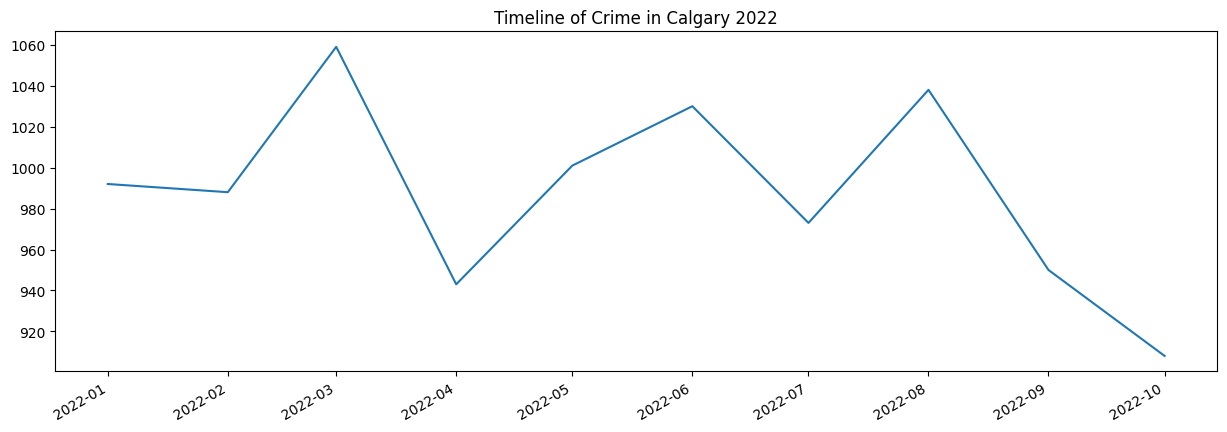

In [16]:
#Crime count over time
test_data['date'].value_counts().plot(figsize=(15,5))
plt.title('Timeline of Crime Count in Calgary 2022')